## Notebook for ENCN375 Lecture A: Systems Analysis

In this notebook, we will look a little bit at networks, network analysis, Open Street Map, and plotting. 

> To run notebook cells, click inside the block (add to the code or write your own) and press <code>Ctrl+Enter</code>
> If you've never used a Jupyter notebook before, you can practice with the first two blocks of code below

In [1]:
# We'll start by defining a simple function
def hello_world(name):
    # name is a string input
    print('Hello, world this is '+name+'!')

In [4]:
# Now we can practice calling our function - try inputting the code you need below
hello_world("Bec")

Hello, world this is Bec!


### Coding begins here

Now that you've practiced, you can use the notebook below for the lecture activities. Blocks will add themselves to the notebook automatically, or you can use the '+' button on the top ribbon to add more. You can save your notebook and outputs when you're finished. 

In [5]:
# Often we start by loading any packages we think we might need for our code
# There's a few key ones we require for today, but you can call more if you're getting fancy:
import pandas as pd
import numpy as np
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

We'll start by looking at some network data and doing some simple network analysis. The <code>networkx</code> package has some empirical data that we will take advantage of for this lecture. 

We'll be loading and investigating the dataset called Zachary's Karate Club, a dataset that describes social connections between members of a university Karate Club. The network has 34 members of a karate club, and shows links between members who interacted outside the club. This club was studied (for social cohesion and conflict) and during the study, a conflict between the administrator "John A" and instructor "Mr. Hi" (pseudonyms) led to the split of the club.

We'll refer to the package documents to help us find useful functions within <code>networkx</code>. They can be found <a href=https://networkx.org/documentation/stable/reference/index.html>here</a>.

In [6]:
# first step is to load in the data - I've done this one for you
g_karate = nx.karate_club_graph()

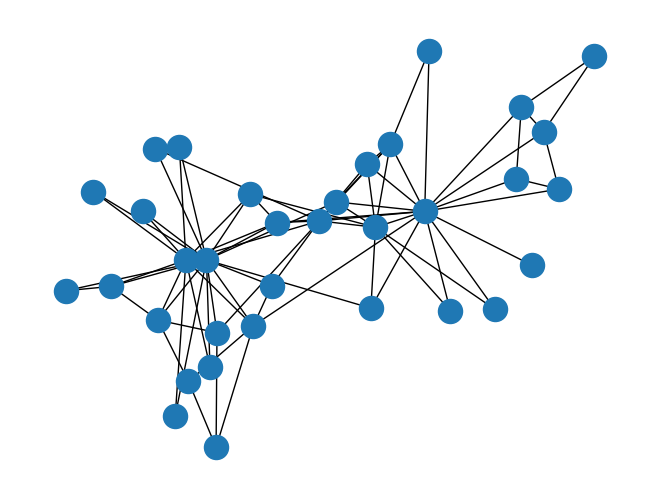

In [7]:
# now, use the in-built functions to visualise the network
nx.draw(g_karate)

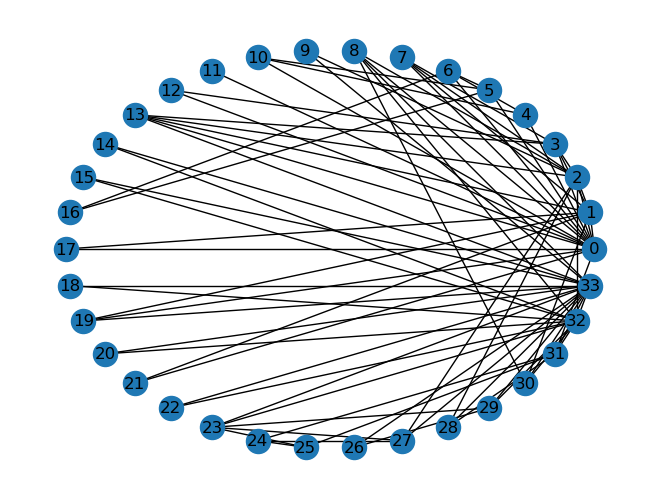

In [9]:
# plot the network with a different layout using the built-in functions
nx.draw_circular(g_karate, with_labels=True)

In [25]:
# Get a bit of information about the network. What sort of data are we looking at? 
# Each node contains information about the club that person belongs to. How many belong to Mr. Hi vs John A?
# nx.info(g_karate)
attrs = nx.get_node_attributes(g_karate, "club")

In [34]:
for v in attrs.values():
    print(v)

Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Officer
Mr. Hi
Mr. Hi
Mr. Hi
Mr. Hi
Officer
Officer
Mr. Hi
Mr. Hi
Officer
Mr. Hi
Officer
Mr. Hi
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer
Officer


In [50]:
count_H = 0

for v in attrs.values():
    if v == "Mr. Hi":
        count_H += 1
    else:
        count_H = count_H

count_A = 34-count_H

print("There are {0} members in Mr. Hi's club, and {1} members in Officers's club".format(count_H,count_A))

There are 17 members in Mr. Hi's club, and 17 members in Officers's club


In [51]:
# now, use networkx to calculate some basic network statistics. Print out your results. 
nodes =  g_karate.number_of_nodes()
links = g_karate.number_of_edges()
beta = links/nodes
density = nx.density(g_karate)

print("nodes: {0}, links: {1}, beta:{2:.2f}, density: {3:.2f}".format(nodes, links, beta, density))

nodes: 34, links: 78, beta:2.29, density: 0.14


In [57]:
# next we'll look at the nodes themselves. Calculate the degree, closeness, and betweenness of the nodes
# store your answers in a dataframe and print them out
node = list(g_karate.nodes())
degree = [v for (d,v) in g_karate.degree()]
cc = list(nx.closeness_centrality(g_karate).values())
bc = list(nx.betweenness_centrality(g_karate).values())

node_sts = pd.DataFrame(zip(*[node, degree, cc, bc]), columns=['nodes','degree','closeness','betweenness'])

In [58]:
node_sts

,nodes,degree,closeness,betweenness
0,0,16,0.568966,0.437635
1,1,9,0.485294,0.053937
2,2,10,0.559322,0.143657
3,3,6,0.464789,0.011909
4,4,3,0.379310,0.000631
5,5,4,0.383721,0.029987
6,6,4,0.383721,0.029987
7,7,4,0.440000,0.000000
8,8,5,0.515625,0.055927
9,9,2,0.434211,0.000848


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, "Node degree of Zach's Karate Club")

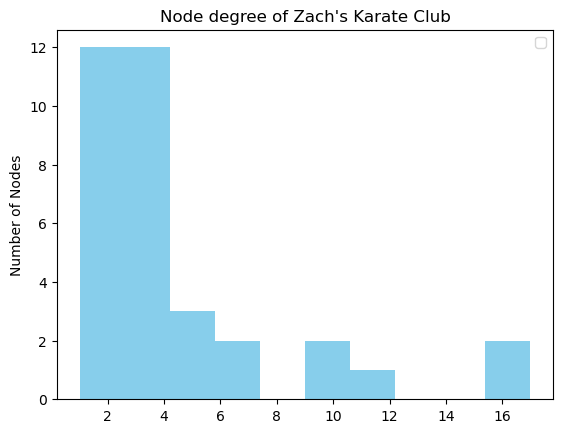

In [59]:
# lets make a quick histogram of node degrees. Change the default colour to something nicer and include axis titles
plt.hist(degree, color='skyblue')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title("Node degree of Zach's Karate Club")

Now that we've done a bit of work with networks in Python, let's familiarise ourselves with Open Street Map (OSM). OSM is a publicly accessible database of street and building footprints across the world. The <code>osmnx</code> package lets us easily access this database and convert information from OSM to networks. We'll take a simple example for this tutorial of Irvine, California, USA. 

Similar to our network calculations above, we'll be referring to the docs to find the functions we need in the <code>osmnx</code> package - you'll find those <a href=https://osmnx.readthedocs.io/en/stable/osmnx.html>here</a>.

In [60]:
# download the street network for Irvine, Califonia
G = ox.graph_from_place("Irvine, California, USA", network_type="drive")

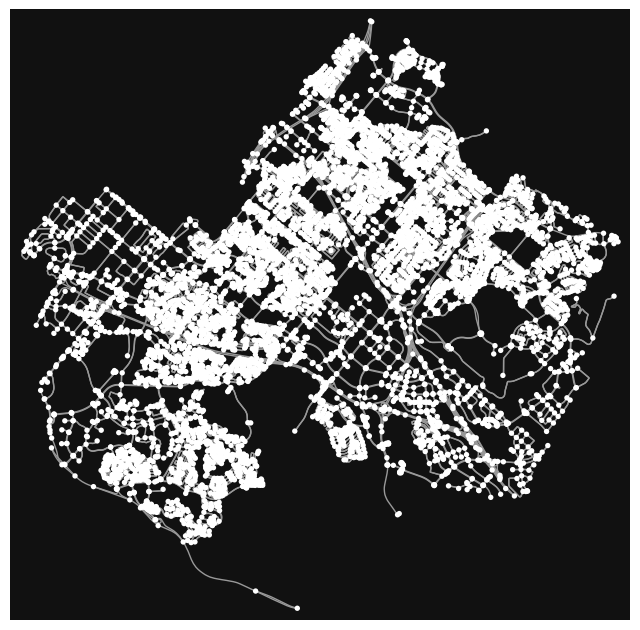

In [61]:
# visulise the street network
fig, ax = ox.plot_graph(G)

In [62]:
# take a look at the data in the network. What are the edge attributes?
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.head()

osmid  oneway      lanes  \
u        v          key                                                         
14840399 1272633228 0     [13279355, 920702875, 406463189]    True  [2, 3, 5]   
         775894826  0     [838435960, 29198043, 172593844]    True     [6, 5]   
17411422 296090109  0    [779003746, 779003747, 779003748]    True     [7, 6]   
32277579 1181715515 0                            406256759    True          2   
         2321264031 0                            406228084    True          5   

                               highway reversed   length  \
u        v          key                                    
14840399 1272633228 0    motorway_link    False  658.966   
         775894826  0         motorway    False  772.532   
17411422 296090109  0         motorway    False  321.085   
32277579 1181715515 0    motorway_link    False   13.287   
         2321264031 0          primary    False  222.507   

                                                                  geometry  \
u        v          key                                                      
14840399 1272633228 0    LINESTRING (-117.78731 33.71393, -117.78635 33...   
         775894826  0    LINESTRING (-117.78731 33.71393, -117.78555 33...   
17411422 296090109  0    LINESTRING (-117.78481 33.66123, -117.78468 33...   
32277579 1181715515 0    LINESTRING (-117.84472 33.67574, -117.84461 33...   
         2321264031 0    LINESTRING (-117.84472 33.67574, -117.84510 33...   

                           ref               name maxspeed bridge access  \
u        v          key                                                    
14840399 1272633228 0      NaN                NaN      NaN    NaN    NaN   
         775894826  0      I 5  Santa Ana Freeway   65 mph    yes    NaN   
17411422 296090109  0    I 405  San Diego Freeway   65 mph    NaN    NaN   
32277579 1181715515 0      NaN                NaN      NaN    NaN    NaN   
         2321264031 0      NaN      Jamboree Road   50 mph    NaN    NaN   

                        width junction tunnel  
u        v          key                        
14840399 1272633228 0     NaN      NaN    NaN  
         775894826  0     NaN      NaN    NaN  
17411422 296090109  0     NaN      NaN    NaN  
32277579 1181715515 0     NaN      NaN    NaN  
         2321264031 0     NaN      NaN    NaN

In [63]:
# calculate some basic network statistics using the in-built functions.
ox.basic_stats(G)

{'n': 7862,
 'm': 17750,
 'k_avg': 4.515390485881455,
 'edge_length_total': 2265657.74500001,
 'edge_length_avg': 127.64268985915548,
 'streets_per_node_avg': 2.761638259984737,
 'streets_per_node_counts': {0: 0,
  1: 1795,
  2: 90,
  3: 4264,
  4: 1624,
  5: 85,
  6: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.22831340625794963,
  2: 0.011447468837445943,
  3: 0.54235563469855,
  4: 0.20656321546680234,
  5: 0.010811498346476723,
  6: 0.0005087763927753752},
 'intersection_count': 6067,
 'street_length_total': 1496256.749000002,
 'street_segment_count': 10829,
 'street_length_avg': 138.17127611044435,
 'circuity_avg': 1.107396560242082,
 'self_loop_proportion': 0.01662203342875612}

In [69]:
# what do the values above mean? Make some nice print statements to give some of the stats highlights.
sts = ox.basic_stats(G)
print("There are {0} nodes and {1} edges in the Network.".format(sts['n'],sts['m'])) 
print("The average node degree is {0:.2f} and there are {1:.0f} total km of roads in the network".format(sts['k_avg'],sts['edge_length_total']/1000))

There are 7862 nodes and 17750 edges in the Network.
The average node degree is 4.52 and there are 2266 total km of roads in the network


In [70]:
# find the most central node in terms of betweenness centrality. What percentage of roads pass through this node?
# for this, we'll convert our graph to a digraph (no parallel links) and calculate betweenness based on road length
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])

(122820311, 0.10795269784516145)

In [77]:
print("The most central node in the network is {0}, and approximately {1:.0%} of roads pass through it.".format(max_node, max_bc))

The most central node in the network is 122820311, and approximately 11% of roads pass through it


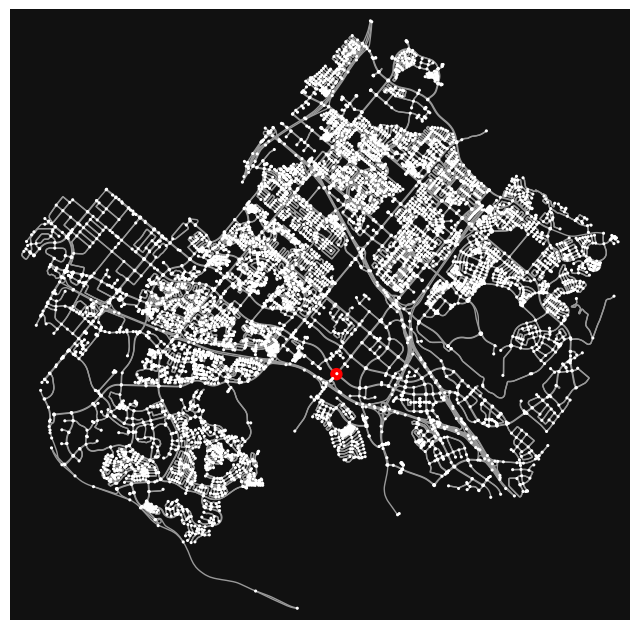

In [78]:
# plot the street network with the most central node highlighted
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 5 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

Now we'll do some fancy visualisation for closeness centrality by inverting our network (so that nodes become links and vice versa). We'll make use of a colourmap from <code>matplotlib</code> - more details <a href=https://matplotlib.org/stable/tutorials/colors/colormaps.html>here</a>.

In [80]:
# first, we convert our graph into a line graph, which accomplishes this "flip" for us
G_line = nx.line_graph(G)

# then we can calculate the closeness centrality of our new "edges"
edge_cc = nx.closeness_centrality(G_line)

# and set this value as an edge attribute in our orignal (unflipped) network with the name "edge closeness"
nx.set_edge_attributes(G, edge_cc, "edge_centrality")

In [81]:
# to plot, we need to map our edge closeness attribute onto a colourmap
e_clrs = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")

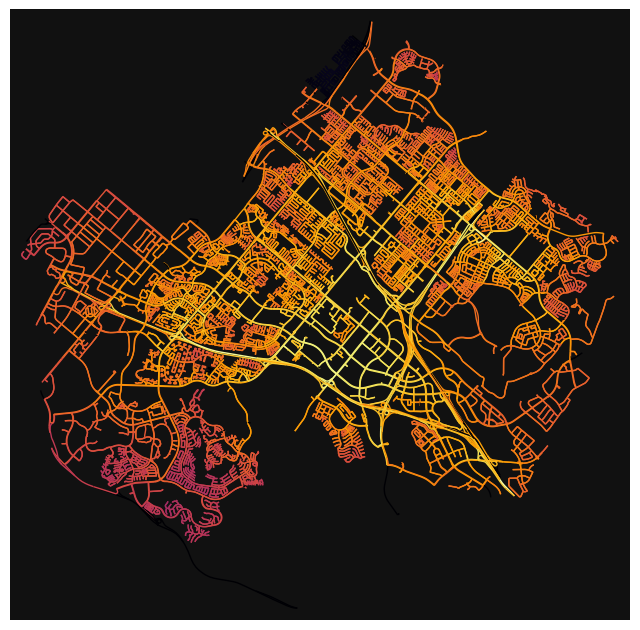

In [84]:
# then we can plot, setting our edge colours to our mapped ones (above) and the node size to zero (for a clean plot)
fig, ax = ox.plot_graph(G, edge_color=e_clrs, edge_linewidth=1, node_size=0)